In [1]:
# !pip install elasticsearch

In [7]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import re
from datetime import datetime

from dataQuery import SendQuery

In [42]:
es_username = "xindong.x"
es_password = "Azerty123!"

run = 6
if run == 3:
    id_machine = "00007"
    startTime = "2023-08-25T18:00:00+02:00"
    stopTime  = "2023-08-27T10:21:00+02:00"
    log_path  = "./00007_btl/run" + str(run) + "/log.txt"
elif run == 4:
    id_machine = "00007"
    startTime = "2023-08-28T15:00:00+02:00"
    stopTime  = "2023-08-29T06:00:00+02:00"
    log_path  = "./00007_btl/run" + str(run) + "/log.txt"
elif run == 5:
    id_machine = "00007"
    startTime = "2023-08-29T13:00:00+02:00"
    stopTime  = "2023-08-29T14:20:00+02:00"
    log_path  = "./00007_btl/run" + str(run) + "/log.txt"
elif run == 6:
    id_machine = "00007"
    startTime = "2023-08-29T14:20:00+02:00"
    stopTime  = "2023-08-29T19:00:00+02:00"
    log_path  = "./00007_btl/run" + str(run) + "/log.txt"

data_session = SendQuery(es_username, es_password, id_machine, startTime, stopTime, es_index = "stream-reporting-sessions")
data_packing = SendQuery(es_username, es_password, id_machine, startTime, stopTime, es_index = "stream-reporting-packings")

In [43]:
data_session

,machineSerialNumber,sessionStart-1s,sessionStop,nbBottle
session_id,,,,
1,00007,2023-08-29 14:22:41.554414,2023-08-29 14:23:30.759361,7
2,00007,2023-08-29 14:40:11.991361,2023-08-29 14:49:01.545363,56
3,00007,2023-08-29 14:49:19.736586,2023-08-29 14:53:16.625738,20
4,00007,2023-08-29 15:03:00.814443,2023-08-29 15:06:26.158611,19
5,00007,2023-08-29 15:12:49.234046,2023-08-29 15:22:22.239287,47
6,00007,2023-08-29 15:27:59.938203,2023-08-29 15:34:42.645404,20
7,00007,2023-08-29 15:37:06.681545,2023-08-29 15:43:57.284951,6
8,00007,2023-08-29 15:46:23.403273,2023-08-29 15:57:20.142441,52
9,00007,2023-08-29 15:57:36.208747,2023-08-29 16:00:48.389614,23


In [44]:
data_session['nbBottle'].sum()

639

In [45]:
with open(log_path, 'r') as file:
    log_data = file.read()
    
in_matches  = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers in  (\d+)', log_data)
out_matches = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers out (\d+)', log_data)

data_ia_dict = {}
for match in in_matches:
    timestamp = datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f')
    data_ia_dict[timestamp] = True

for match in out_matches:
    timestamp = datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f')
    data_ia_dict[timestamp] = False

In [46]:
data_ia = pd.DataFrame(list(data_ia_dict.items()), columns=['actionTime', 'isIn_Out'])
data_ia = data_ia.sort_values(by='actionTime', ascending=True)
data_ia.reset_index(drop=True, inplace=True)
data_ia.index += 1
data_ia.index.name = 'count_id'

data_ia

,actionTime,isIn_Out
count_id,,
1,2023-08-29 14:22:42.792,True
2,2023-08-29 14:22:47.672,True
3,2023-08-29 14:22:52.134,True
4,2023-08-29 14:22:56.953,True
5,2023-08-29 14:23:09.033,True
...,...,...
741,2023-08-29 18:55:22.291,True
742,2023-08-29 18:57:49.281,True
743,2023-08-29 18:58:24.026,True


In [47]:
data_ia['isIn_Out'].value_counts()

True     696
False     49
Name: isIn_Out, dtype: int64

In [48]:
len(data_ia[data_ia['isIn_Out'] == True]) - len(data_ia[data_ia['isIn_Out'] == False])

647

In [ ]:
def between2Packing(start, stop, data_dict):
    count_id_list = [count for time, count in data_dict.items() if start <= time <= stop]
    if len(count_id_list) == 0:
        return 0
    else:
        return len(count_id_list)

In [ ]:
with open(log_path, 'r') as file:
    log_data = file.read()
    
in_matches  = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers in  (\d+)', log_data)
out_matches = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers out (\d+)', log_data)

in_dict  = {datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f'): int(match[1]) for match in in_matches}
out_dict = {datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f'): int(match[1]) for match in out_matches}

In [ ]:
df = data_packing.copy()
df = df[['machineSerialNumber', 'session_id', 'actionTime', 'isAccept']]

df['last_actionTime'] = df['actionTime'].shift(1)
df.at[df.index[0], 'last_actionTime'] = "2000-01-01 00:00:00.000"
df['last_actionTime'] = pd.to_datetime(df['last_actionTime'], format='%Y-%m-%d %H:%M:%S.%f')

df['nb_in']  = df.apply(lambda row: between2Packing(row['last_actionTime'], row['actionTime'], in_dict),  axis=1)
df['nb_out'] = df.apply(lambda row: between2Packing(row['last_actionTime'], row['actionTime'], out_dict), axis=1)
df['isAcceptIA'] = df['nb_in'] - df['nb_out']
df.drop(columns=['last_actionTime'], inplace=True)

df['count_in']  = df['nb_in'].cumsum()
df['count_out'] = df['nb_out'].cumsum()

In [5]:
run = 3
if run == 3:
    session_path = './00007_btl/run3/Session-00007-08251800-08271030.csv'
    packing_path = './00007_btl/run3/Packing-00007-08251800-08271030.csv'
    log_path  = './00007_btl/run3/log.txt'
elif run == 4:
    session_path = './00007_btl/run4/Session-00007-08281500-08291200.csv'
    log_path  = './00007_btl/run4/log.txt'

In [10]:
data_ihm = pd.read_csv(session_path, delimiter = ';')

column_list = ['machineSerialNumber', 'sessionStart', 'sessionStop', 'nbBottle']
data_ihm = data_ihm[column_list]

data_ihm['sessionStart'] = pd.to_datetime(data_ihm['sessionStart'])
data_ihm['sessionStop'] = pd.to_datetime(data_ihm['sessionStop'])
data_ihm['sessionStart'] = data_ihm['sessionStart'] + pd.Timedelta(hours=2) - pd.Timedelta(seconds=1)
data_ihm['sessionStop'] = data_ihm['sessionStop'] + pd.Timedelta(hours=2)# + pd.Timedelta(seconds=6)
data_ihm['sessionStart'] = data_ihm['sessionStart'].dt.tz_localize(None)
data_ihm['sessionStop'] = data_ihm['sessionStop'].dt.tz_localize(None)

data_ihm = data_ihm.sort_values(by='sessionStart', ascending=True)
data_ihm.reset_index(drop=True, inplace=True)
data_ihm.index += 1
data_ihm.index.name = 'session_id'

print(data_ihm.info())
data_ihm.head(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 1 to 40
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   machineSerialNumber  40 non-null     int64         
 1   sessionStart         40 non-null     datetime64[ns]
 2   sessionStop          40 non-null     datetime64[ns]
 3   nbBottle             40 non-null     int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 1.4 KB
None


,machineSerialNumber,sessionStart,sessionStop,nbBottle
session_id,,,,
1,7,2023-08-25 19:33:18.338,2023-08-25 19:38:53.521,36
2,7,2023-08-25 19:39:10.277,2023-08-25 19:39:20.227,1
3,7,2023-08-26 08:30:11.979,2023-08-26 08:32:29.342,13
4,7,2023-08-26 08:36:06.975,2023-08-26 08:37:44.166,8
5,7,2023-08-26 08:42:25.958,2023-08-26 08:47:21.415,30
6,7,2023-08-26 08:51:46.134,2023-08-26 08:56:11.732,30
7,7,2023-08-26 09:19:12.021,2023-08-26 09:19:52.830,6
8,7,2023-08-26 09:42:05.502,2023-08-26 09:48:31.371,53
9,7,2023-08-26 09:49:18.077,2023-08-26 09:51:37.842,18


In [11]:
print('en total', data_ihm['nbBottle'].sum())
print(data_ihm['sessionStart'].min())
print(data_ihm['sessionStop'].max())

en total 950
2023-08-25 19:33:18.338000
2023-08-27 10:20:43.645000


en total 950


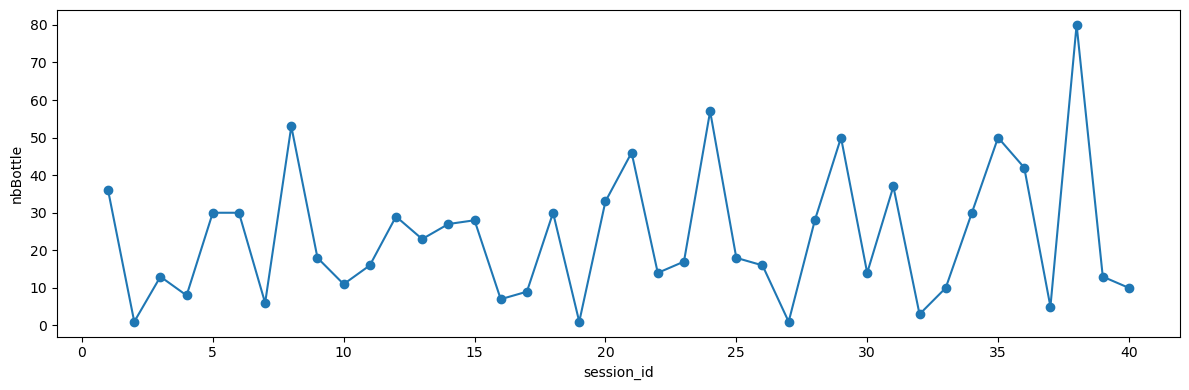

In [6]:
plt.figure(figsize=(12, 4))

plt.plot(data_ihm.index, data_ihm['nbBottle'], marker='o', linestyle='-')
plt.xlabel('session_id')
plt.ylabel('nbBottle')
# plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
data_packing = pd.read_csv(packing_path, delimiter = ';')

column_list = ['machineSerialNumber', 'createdAt', 'accept']
data_packing = data_packing[column_list]
data_packing.columns = ['machineSerialNumber', 'actionTime', 'isAccept']

data_packing['actionTime'] = pd.to_datetime(data_packing['actionTime'])
# data_packing['sessionStop'] = pd.to_datetime(data_packing['sessionStop'])
data_packing['actionTime'] = data_packing['actionTime'] + pd.Timedelta(hours=2)# - pd.Timedelta(seconds=1)
# data_packing['sessionStop'] = data_packing['sessionStop'] + pd.Timedelta(hours=2)# + pd.Timedelta(seconds=6)
data_packing['actionTime'] = data_packing['actionTime'].dt.tz_localize(None)
# data_packing['sessionStop'] = data_packing['sessionStop'].dt.tz_localize(None)

data_packing = data_packing.sort_values(by='actionTime', ascending=True)
data_packing.reset_index(drop=True, inplace=True)
data_packing.index += 1
data_packing.index.name = 'packing_id'

print(data_packing.info())

In [7]:
with open(log_path, 'r') as file:
    log_data = file.read()

in_matches = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers in  (\d+)', log_data)
out_matches = re.findall(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\,\d{3}).*?count numbers out (\d+)', log_data)

in_dict = {datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f'): int(match[1]) for match in in_matches}
out_dict = {datetime.strptime(match[0], '%Y-%m-%d %H:%M:%S,%f'): int(match[1]) for match in out_matches}

In [8]:
def compute_counts(start, stop, data_dict):
    return len([count for time, count in data_dict.items() if start <= time <= stop])

In [9]:
df = data_ihm.copy()

# df['last_sessionStop'] = df['sessionStop'].shift(1)
# df.at[df.index[0], 'last_sessionStop'] = "2000-01-01 00:00:00.000"
# df['last_sessionStop'] = pd.to_datetime(df['last_sessionStop'], format='%Y-%m-%d %H:%M:%S.%f')
# df['count_in'] = df.apply(lambda row: compute_counts(row['last_sessionStop'], row['sessionStop'], in_dict), axis=1)
# df['count_out'] = df.apply(lambda row: compute_counts(row['last_sessionStop'], row['sessionStop'], out_dict), axis=1)
# df.drop(columns=['last_sessionStop'], inplace=True)

df['count_in'] = df.apply(lambda row: compute_counts(row['sessionStart'], row['sessionStop'], in_dict), axis=1)
df['count_out'] = df.apply(lambda row: compute_counts(row['sessionStart'], row['sessionStop'], out_dict), axis=1)

df['nbBottle_ia'] = df['count_in'] - df['count_out']
df['nb_diff'] = df['nbBottle_ia'] - df['nbBottle']

column_list = ['machineSerialNumber', 'sessionStart', 'sessionStop', 'nbBottle', 'nbBottle_ia', 'nb_diff', 'count_in', 'count_out']
df = df[column_list]

In [10]:
df

,machineSerialNumber,sessionStart,sessionStop,nbBottle,nbBottle_ia,nb_diff,count_in,count_out
session_id,,,,,,,,
1,7,2023-08-25 19:33:18.338,2023-08-25 19:38:53.521,36,36,0,38,2
2,7,2023-08-25 19:39:10.277,2023-08-25 19:39:20.227,1,1,0,1,0
3,7,2023-08-26 08:30:11.979,2023-08-26 08:32:29.342,13,13,0,13,0
4,7,2023-08-26 08:36:06.975,2023-08-26 08:37:44.166,8,9,1,9,0
5,7,2023-08-26 08:42:25.958,2023-08-26 08:47:21.415,30,30,0,30,0
6,7,2023-08-26 08:51:46.134,2023-08-26 08:56:11.732,30,28,-2,29,1
7,7,2023-08-26 09:19:12.021,2023-08-26 09:19:52.830,6,6,0,6,0
8,7,2023-08-26 09:42:05.502,2023-08-26 09:48:31.371,53,53,0,53,0
9,7,2023-08-26 09:49:18.077,2023-08-26 09:51:37.842,18,14,-4,16,2


In [11]:
print('nbBottle 07 res', df['nbBottle'].sum())
print('nbBottle IA res', df['count_in'].sum() - df['count_out'].sum())
print('nbBottle IA in ', df['count_in'].sum())
print('nbBottle IA out', df['count_out'].sum())
print('nbBottle IA dif', df['nb_diff'].apply(abs).sum())

nbBottle 07 res 950
nbBottle IA res 943
nbBottle IA in  987
nbBottle IA out 44
nbBottle IA dif 25
